In [7]:
from IPython.display import display, Math

In [1]:
import pandas as pd
from fractions import Fraction as F
import matplotlib.pyplot as plt
import numpy as np

Definir una función que calcula el polinomio de Taylor de orden $n$ (de grado $2n+1$):

$f_n(x)=\sum_{i=0}^{n} \frac{\left(-1\right)^{i}}{\left(2i+1\right)!} x^{2i+1} = x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\cdots+\frac{\left(-1\right)^{n}}{\left(2n+1\right)!} x^{2n+1}$

en un número $x$:

In [2]:
def sin(x,n):
    assert type(n)==int and n>=0
    return sum(
        [((-1)**i)*(x**(2*i+1))*F(1,np.math.factorial(2*i+1)) for i in range(n+1)]
    )

Por ejemplo: para calcular $f_0(x)=x$ en $x=\frac{3}{2}$, usamos:

In [11]:
x0=F(3,2)
y0=sin(x0,0)
display(Math(f'$f_0({x0})={y0}={float(y0)}$'))

<IPython.core.display.Math object>

Mientras que para calcular $f_1(x)=x-\frac{x^{3}}{3!}$, usamos:

In [12]:
y1=sin(x0,1)
display(Math(f'$f_1({x0})={y1}={float(y1)}$'))

<IPython.core.display.Math object>

El resultado que daría _la calculadora_ para $f(x)=\sin(x)$ sería:

In [18]:
y=np.math.sin(x0)
display(Math(f'\sin({x0})={y}'))

<IPython.core.display.Math object>

El resultado anterior sería mejor aproximado por $f_{5}(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\frac{x^9}{9!}-\frac{x^{11}}{11!}$:

In [17]:
y5=sin(x0,5)
display(Math(f'$f_5({x0})={y5}={float(y5)}$'))

<IPython.core.display.Math object>

cuya diferencia con $f(x)=\sin(x)$ es de:

In [19]:
abs(y-y5)

3.0921919247361984e-08

(una diferencia menor a una parte en $10000000=10^7$: ambos resultados sólo difieren hasta el octavo dígito después del punto).

Ahora vamos a hacer una gráfica:

In [33]:
X=np.linspace(-3, 3, num=6001, endpoint=True)
Y={f'$f_{i}(x)$':[sin(x,i) for x in X] for i in range(6)}
Y['$\sin(x)$']=np.sin(X)

In [58]:
taylor=pd.DataFrame(Y,index=X)
taylor.index.rename('$x$',inplace=True)
taylor

,$f_0(x)$,$f_1(x)$,$f_2(x)$,$f_3(x)$,$f_4(x)$,$f_5(x)$,$\sin(x)$
$x$,,,,,,,
-3.000,-3.000,1.500000,-0.525000,-0.091071,-0.145312,-0.140875,-0.141120
-2.999,-2.999,1.496501,-0.525126,-0.092209,-0.146287,-0.141866,-0.142110
-2.998,-2.998,1.493006,-0.525253,-0.093345,-0.147262,-0.142856,-0.143100
-2.997,-2.997,1.489513,-0.525382,-0.094482,-0.148236,-0.143847,-0.144089
-2.996,-2.996,1.486024,-0.525512,-0.095617,-0.149211,-0.144838,-0.145079
...,...,...,...,...,...,...,...
2.996,2.996,-1.486024,0.525512,0.095617,0.149211,0.144838,0.145079
2.997,2.997,-1.489513,0.525382,0.094482,0.148236,0.143847,0.144089
2.998,2.998,-1.493006,0.525253,0.093345,0.147262,0.142856,0.143100


<AxesSubplot: xlabel='$x$'>

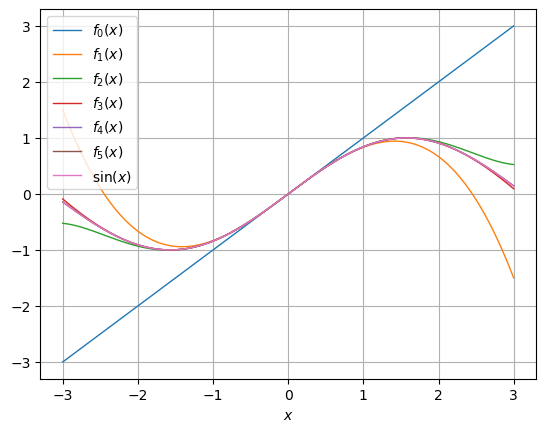

In [59]:
%matplotlib inline
taylor.plot(
    subplots=False,
    grid=True,
    lw=1
)

¿Cómo se comparan $f_n(x)$ y $\sin(x)$ si, por ejemplo, $x=1/2$?

In [60]:
print(taylor.loc[0.5])

$f_0(x)$     0.500000
$f_1(x)$     0.479167
$f_2(x)$     0.479427
$f_3(x)$     0.479426
$f_4(x)$     0.479426
$f_5(x)$     0.479426
$\sin(x)$    0.479426
Name: 0.5, dtype: float64


¿Y si $x\in\{1,2,3\}$?

In [61]:
print(taylor.loc[[1,2,3]])

     $f_0(x)$  $f_1(x)$  $f_2(x)$  $f_3(x)$  $f_4(x)$  $f_5(x)$  $\sin(x)$
$x$                                                                       
1.0       1.0  0.833333  0.841667  0.841468  0.841471  0.841471   0.841471
2.0       2.0  0.666667  0.933333  0.907937  0.909347  0.909296   0.909297
3.0       3.0 -1.500000  0.525000  0.091071  0.145312  0.140875   0.141120


La precisión disminuye conforme $x$ se aleja de $0$.

<AxesSubplot: xlabel='$x$'>

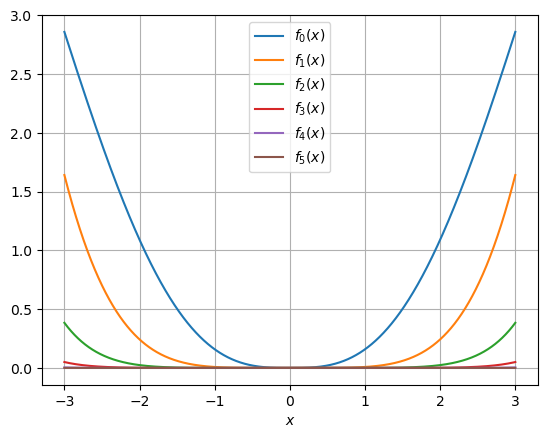

In [71]:
%matplotlib inline
taylor.drop('$\sin(x)$', axis=1).subtract(taylor['$\sin(x)$'],axis=0).abs().plot(
    subplots=False,
    grid=True
)